# Part II - Factors That Affect the Scheduled Monthly Loan Payment
## by Oluwadamilotun Kehinde Oguntuga

## Investigation Overview

> In this investigation, I was interested in determining the factors that affect the scheduled monthly loan payment. My focus was on twelve variables of dataset. The features that stood out in the analysis include the employment status, term of the loan, debt-to-income ratio and the number of investors. These are the features that will be explained in this presentation.

## Dataset Overview

> The Prosper Loan dataset contains one hundred and thirteen thousand records of loans given by Prosper. It contains the details of the borrower information and how the loans are being serviced. It also documents the variables surrounding the borrowing of the loans such as the number of investors, monthly loan payments. The dataset contains a risk score known as the Prosper Score issued by prosper to assess the borrowers based on past loans.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

I performed data wrangling processes on the dataset on these four issues
1. Certain columns have too few values and will not significantly contribute to the analysis process.
2. Not all the loans have ProsperScore
3. Not all the loans have the DebtToIncomeRatio
4. There are ratings of 11 in the ProsperScore column.


In [3]:
# Issue 1

# Drop the columns that have too few values and others that will not significantly contribute
# to my analysis of the data
# first make a copy of the dataframe
prosper_clean = prosper.copy()
prosper_clean.drop(columns = ['CreditGrade','ClosedDate','TotalProsperLoans',
 'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber', 'GroupKey', 'CurrentlyInGroup',
'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
'OpenRevolvingMonthlyPayment', 'PublicRecordsLast10Years',
'RevolvingCreditBalance', 'BankcardUtilization',
'TotalTrades', 'TradesNeverDelinquent (percentage)',
'TradesOpenedLast6Months', 'InquiriesLast6Months',
'MemberKey','LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
'LP_NonPrincipalRecoverypayments'], inplace= True)

In [4]:
# Issue 2 

# Only loans with ProsperScore will be useful for the analysis. Hence, we need
# to filter out loans without ProsperScore

prosper_clean = prosper_clean[prosper_clean.ProsperScore.isnull() == False]

In [5]:
# Issue 3

# Fill the blank records with the mean of the DebtToIncomeRatio
# But first, get the mean
mean = prosper_clean.DebtToIncomeRatio.mean()

# Next, write the code that fills in blank spaces with the mean
prosper_clean.DebtToIncomeRatio = prosper_clean.DebtToIncomeRatio.fillna(mean) 

In [6]:
# Issue 4

# drop the rows with rating of 11 in the ProsperScore column
prosper_clean.drop(prosper_clean[prosper_clean.ProsperScore == 11].index, inplace = True)

In [13]:
# to define the function that contains the axes labels and title of the plot.
def label(a,b,c):
    """
    This function assigns the axes labels and title of the plot where
    a: xlabel
    b: ylabel
    c: title
    """
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(c, y = 1.0, fontdict = {'weight': 'bold'})
    plt.show()

## Distribution of the Scheduled Monthly Loan Payments
The scheduled monthly loan payment showed a bimodal distribution which is right-skewed. The modal scheduled monthly loan payment was about 200. 

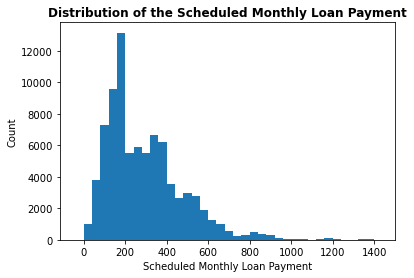

''

In [17]:
# plot the histogram which shows the distribution of the monthly loan payments
bins_m = np.arange(0, 2251.51+40, 40)
plt.hist(data = prosper_clean, x = 'MonthlyLoanPayment', bins = bins_m)
plt.xlim(right = 1500)
label('Scheduled Monthly Loan Payment','Count','Distribution of the Scheduled Monthly Loan Payment')
;

## Average Monthly Loan Payment vs Employment Status

Here, a bar chart is adapted to depict the relationship between the average scheduled monthly loan payment and the employment status. This is because the employment status is a qualitative variable. The full-time employed loanees paid the highest average amount monthly while the part-time employed loanees paid the lowest average amount monthly.

In [8]:
# set the order of the 'EmploymentStatus' column to the order of decreasing average monthly loan payment
employment_order = ['Employed', 'Self-employed', 'Other', 'Not employed', 'Full-time', 'Retired', 'Part-time']
order_emp = pd.api.types.CategoricalDtype(ordered = True, categories = employment_order)
prosper_clean['EmploymentStatus'] = prosper_clean['EmploymentStatus'].astype(order_emp)

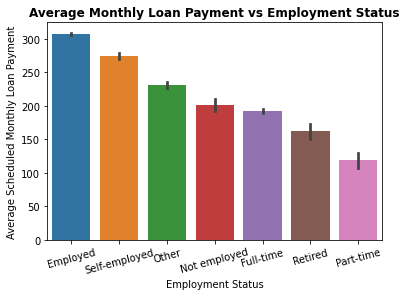

In [16]:
# Adapt a barchart to plot the average scheduled monthly loan payment
# against the employment status with color coding to enhance interpretation

sb.barplot(data = prosper_clean, x = 'EmploymentStatus', y = 'MonthlyLoanPayment')
plt.xticks(rotation = 15)
label('Employment Status','Average Scheduled Monthly Loan Payment','Average Monthly Loan Payment vs Employment Status');

## Relationship between the average scheduled monthly loan payment and the employment status for the different terms of the loan.

This investigates the distribution of the average monthly loan payment for each employment status over the three terms of the loan present. It was noticed that more self employed loanees took out loans for 12 month and had the highest average monthly loan payment in this period.

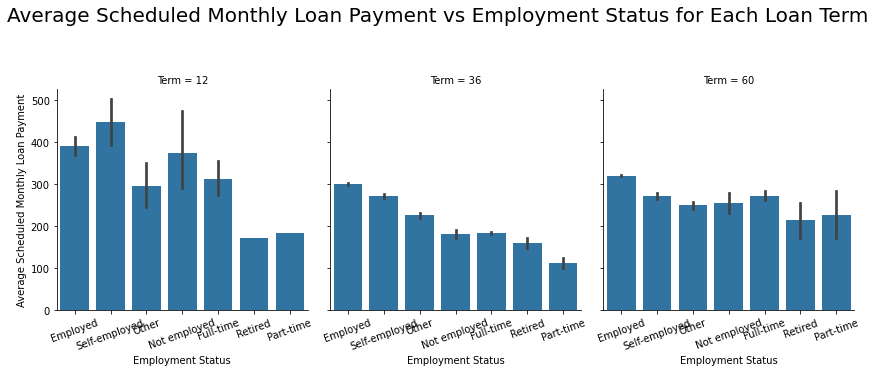

In [10]:
# use seaborn's FacetGrid() function to plot the distribution of the average scheduled monthly loan payment
# and the employment status over the three terms

s = sb.FacetGrid(data = prosper_clean, col = 'Term', height = 4)
s.map(sb.barplot, 'EmploymentStatus', 'MonthlyLoanPayment')
s.set_xticklabels(rotation = 20)
s.set(xlabel = 'Employment Status')
s.set(ylabel = 'Average Scheduled Monthly Loan Payment')
plt.suptitle('Average Scheduled Monthly Loan Payment vs Employment Status for Each Loan Term', y = 1.2,\
            fontsize = 20, fontdict = {'weight': 'bold'});


## Scheduled Monthly Loan Payment vs Number of Investors

This comparison was done with a heatmap that showed an area of high density where the number of investors was very low and the monthly loan payment also was very low. Hence, most loanees had few investors and paid lower amounts monthly.


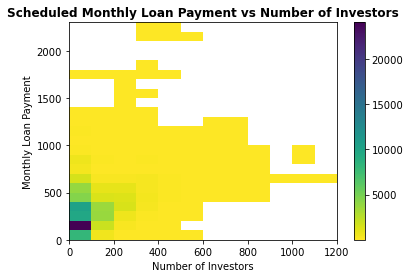

''

In [15]:
# use a heatmap to show the relationship the scheduled montly loan payments and 
# the number of investors who invested in the loan.
bin_x = np.arange(0, 1189+100, 100)
bin_y = np.arange(0, 2251+100, 100)
heatmap = plt.hist2d(data = prosper_clean, x = 'Investors', y = 'MonthlyLoanPayment',
          cmin = 0.5, cmap = 'viridis_r', bins = [bin_x, bin_y])
plt.colorbar()
label('Number of Investors', 'Monthly Loan Payment', 'Scheduled Monthly Loan Payment vs Number of Investors');
;

## Effect of the  the Debt-to-Income Ratio on the Relationship Between Scheduled Monthly Loan Payment and the Number of Investors
Color encoding was used to depict the effect of the debt-to-income ratio and it was discovered that most of the loanees had ratios that are less that 0.5.

In [20]:
# first, generate a random 500 samples to avoid overplotting.
np.random.seed(1000)
sample = np.random.choice(prosper_clean.index, 500, replace = False)
prosper_subset = prosper_clean.loc[sample]

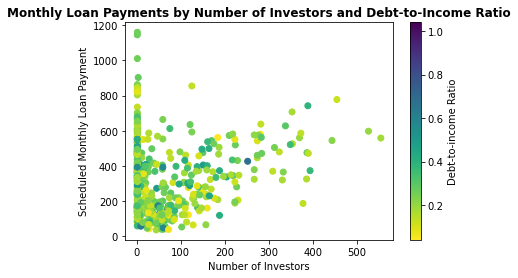

In [21]:
# Use plt.scatter() to plot these variables since they are all quanititatve variables and use 
# sequential color encoding to depict the debt-to-income ratio.
plt.scatter(data = prosper_subset, x = 'Investors', y = 'MonthlyLoanPayment',
            c = 'DebtToIncomeRatio', cmap = 'viridis_r')
plt.colorbar(label = 'Debt-to-income Ratio')
label('Number of Investors','Scheduled Monthly Loan Payment',
     'Monthly Loan Payments by Number of Investors and Debt-to-Income Ratio');

## Relationship Between the Scheduled Monthly Loan Payment and Number of Investors in Terms of the Duration(Term) of the Loan.
This investigation showed that the loanees with the highest monthly loan payment had no investors and took the loan for 36 months.

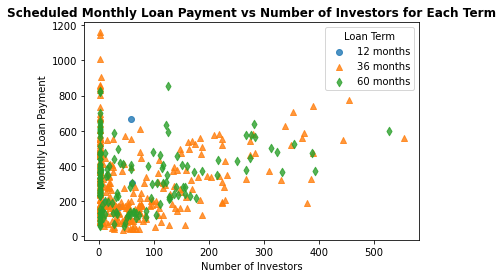

''

In [23]:
# now to plot the third variable which the the 'Term' column
# write a loop that assigns each term to a shape to be plotted on the scatter plot
term_marker = [[12, 'o'], [36, '^'], [60, 'd']]
for term, marker in term_marker:
    plot_data = prosper_subset.loc[prosper_subset.Term == term]
    sb.regplot(data = plot_data, x = 'Investors', y = 'MonthlyLoanPayment',
          fit_reg = False, x_jitter = 0.05, marker = marker)
plt.legend(['12 months', '36 months', '60 months'], title = 'Loan Term')
label('Number of Investors', 'Monthly Loan Payment', 'Scheduled Monthly Loan Payment vs Number of Investors for Each Term');
;
